<h1 style="color:black">Heart Disease Prediction </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', '39110384_ML project.ipynb', 'heart.csv', 'heartdisease.pkl']


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(303, 14)

In [5]:
data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [6]:
data.sample(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

<h1 style="color:black">we have no missing values</h1>

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

Let's understand our columns better

In [12]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing the 'target' variable

In [13]:
data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
data["target"].unique()

array([1, 0], dtype=int64)

Clearly, this is a classification problem, with the target variable having values '0' and '1'

<h1 style="color:black">Checking correlation between columns</h1>

In [15]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

<h1 style="color:black">Visualization </h1>

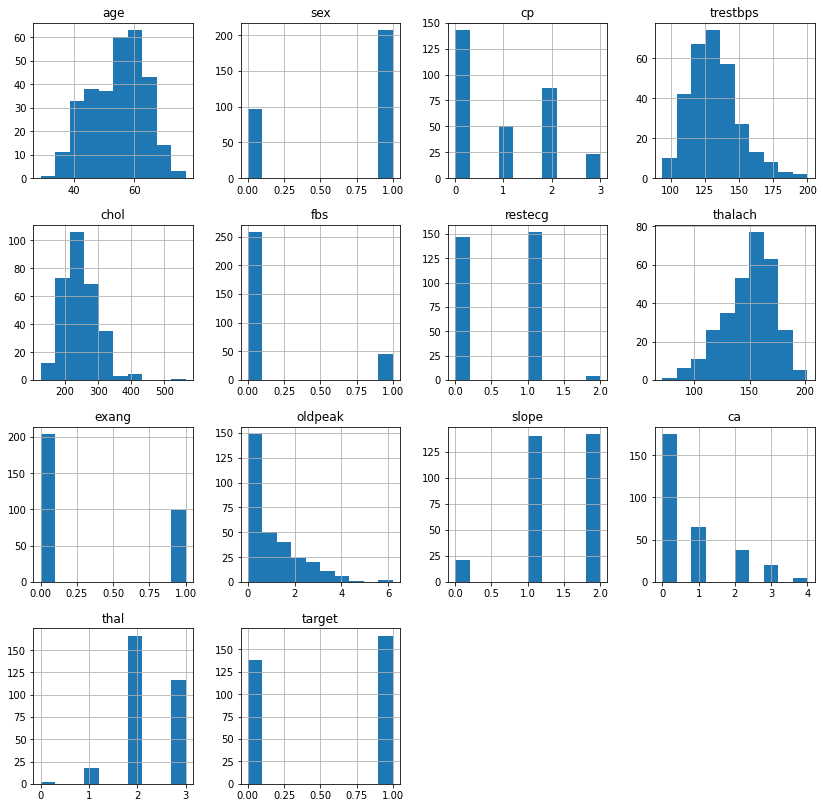

In [16]:
data.hist(figsize=(14,14))
plt.show()

<AxesSubplot:xlabel='sex', ylabel='target'>

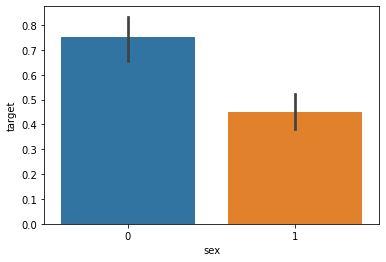

In [17]:
sns.barplot(data['sex'],data['target'])

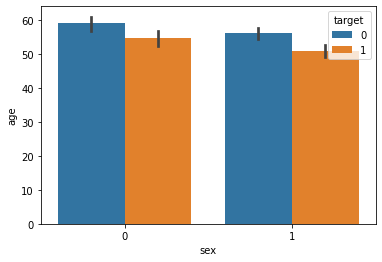

In [18]:
sns.barplot(data['sex'],data['age'],hue=data['target'])
plt.show()

<AxesSubplot:xlabel='cp', ylabel='target'>

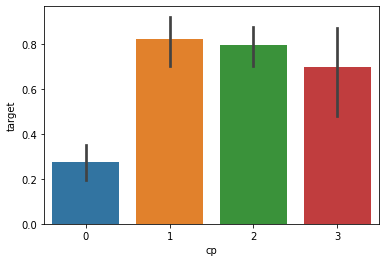

In [19]:
sns.barplot(data['cp'],data['target'])

<AxesSubplot:xlabel='thal', ylabel='Density'>

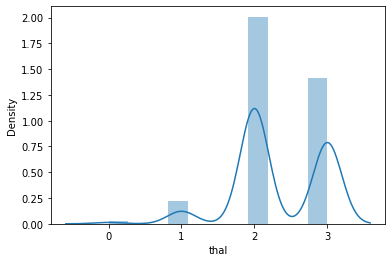

In [20]:
sns.distplot(data['thal'])

<AxesSubplot:xlabel='chol', ylabel='Density'>

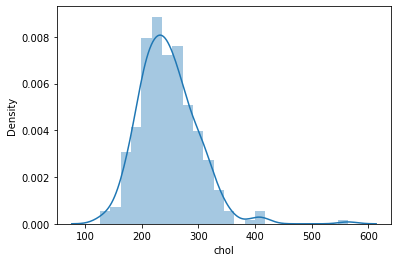

In [21]:
sns.distplot(data['chol'])

In [22]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


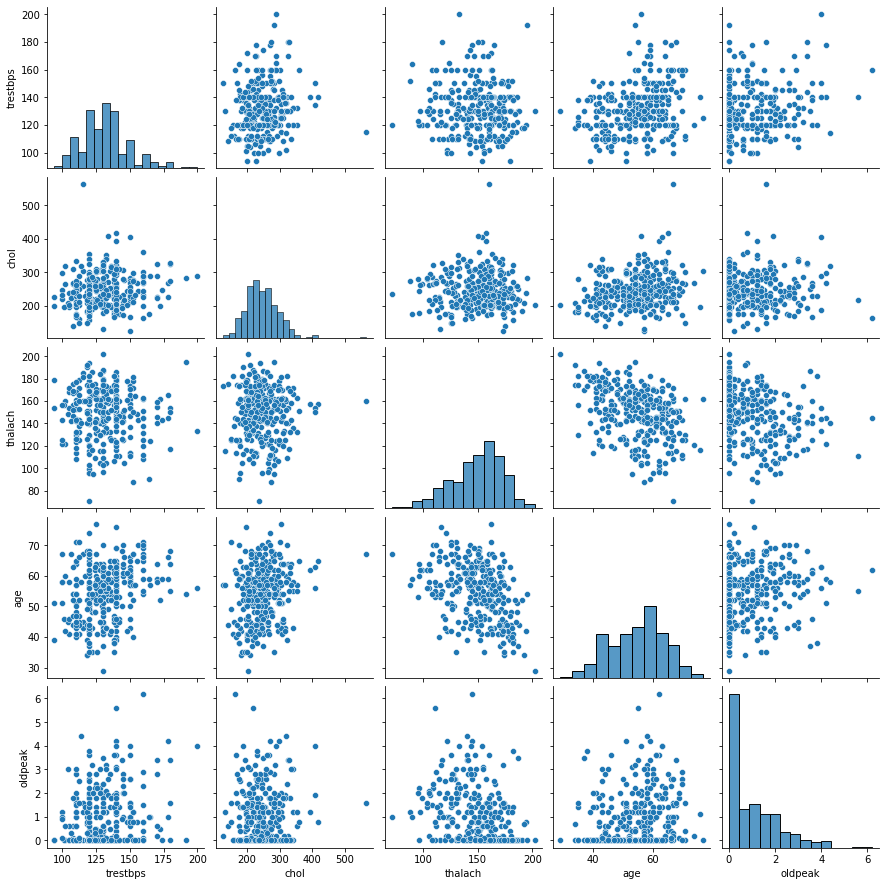

In [23]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.pairplot(data[numeric_columns])

1    165
0    138
Name: target, dtype: int64


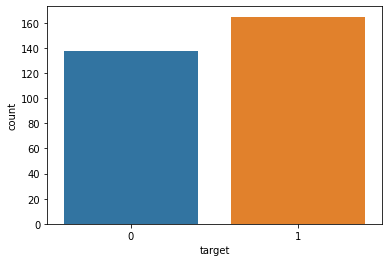

In [24]:
y = data["target"]
sns.countplot(y)
target_temp = data.target.value_counts()

print(target_temp)

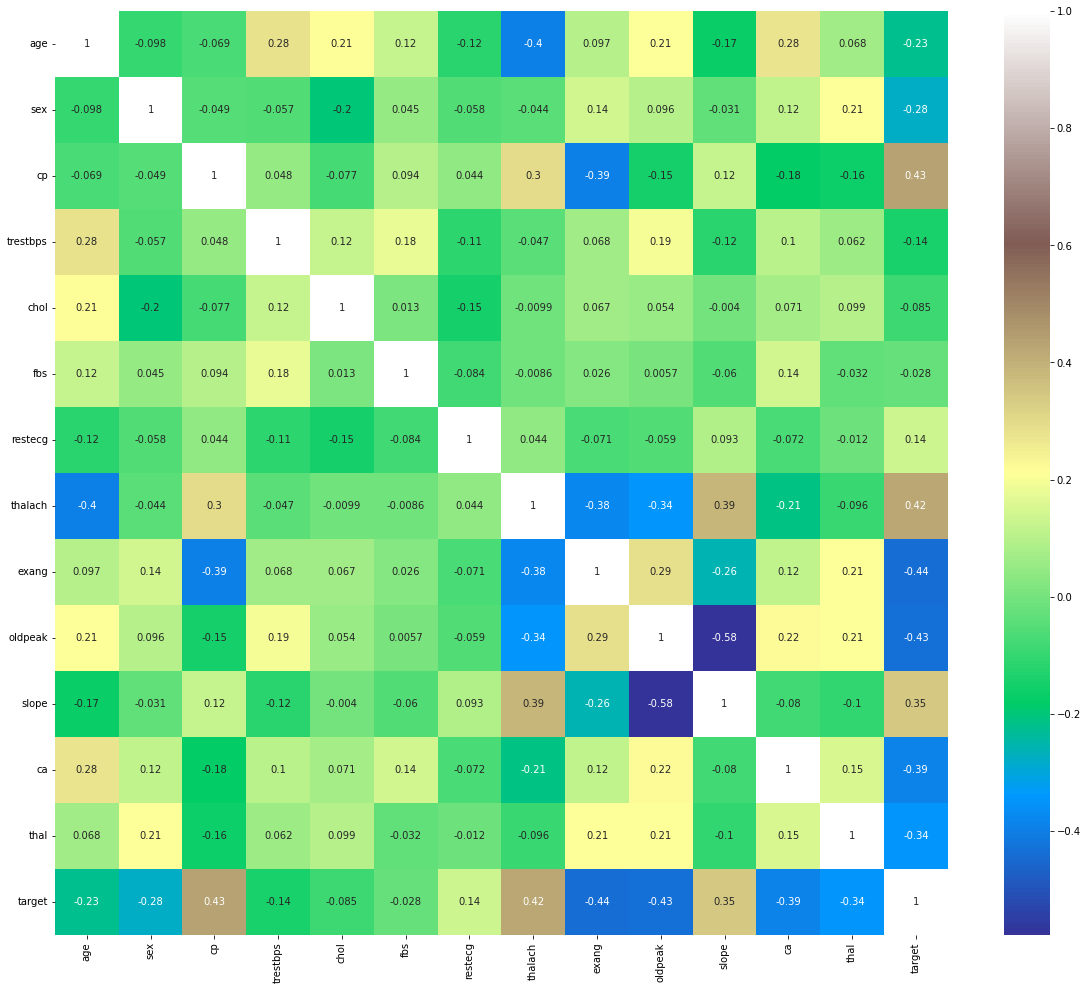

In [25]:
# getting correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index

# ploting heatmap
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(20,17)
plt.show()

Text(0.5, 1.0, 'Maximum heart rate of patients with Heart Disease')

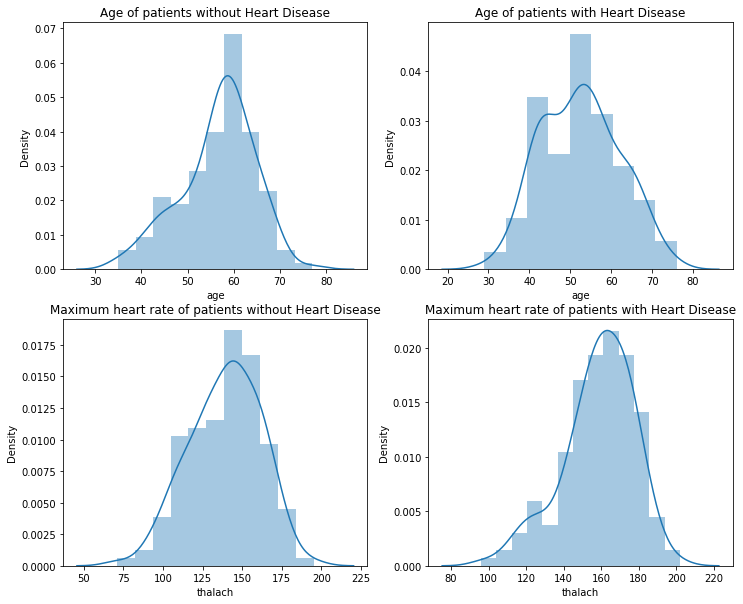

In [26]:
# creating four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['target']==0].age)
plt.title('Age of patients without Heart Disease')

plt.subplot(222)
sns.distplot(data[data['target']==1].age)
plt.title('Age of patients with Heart Disease')

plt.subplot(223)
sns.distplot(data[data['target']==0].thalach)
plt.title('Maximum heart rate of patients without Heart Disease')

plt.subplot(224)
sns.distplot(data[data['target']==1].thalach)
plt.title('Maximum heart rate of patients with Heart Disease')

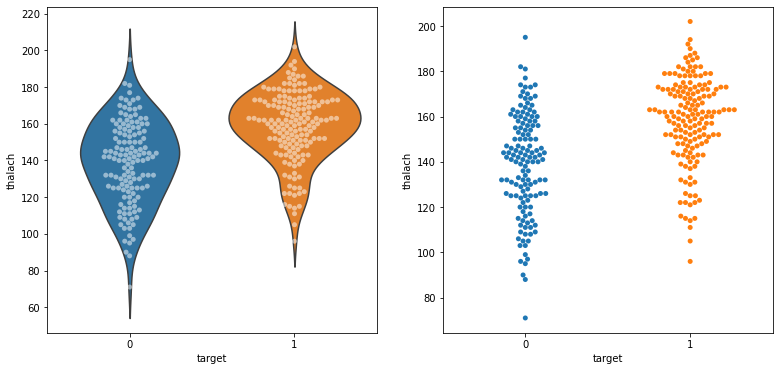

In [27]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x='target',y='thalach', data=data, inner=None)
sns.swarmplot(x='target',y='thalach',data=data,color='w',alpha=0.5)

plt.subplot(122)
sns.swarmplot(x='target',y='thalach',data=data)
plt.show()

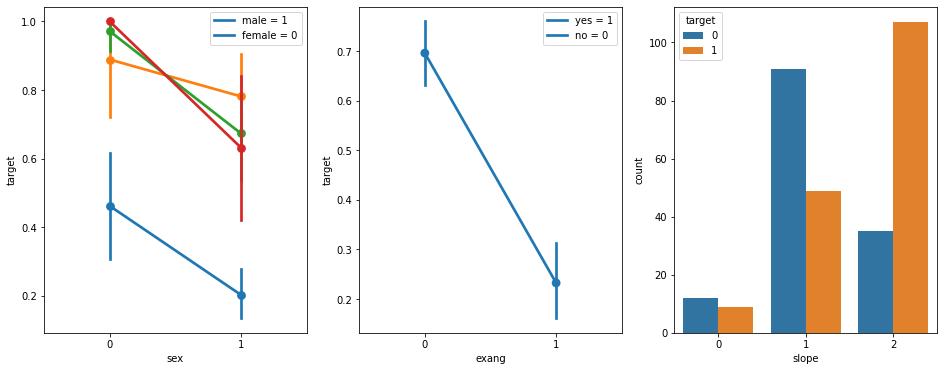

In [28]:
# creating pair plot
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x='sex',y='target',hue='cp',data=data)
plt.legend(['male = 1', 'female = 0'])

plt.subplot(132)
sns.pointplot(x='exang',y='target',data=data)
plt.legend(['yes = 1', 'no = 0'])

plt.subplot(133)
sns.countplot(x="slope", hue='target', data=data)
plt.show()

<h1 style="color:black">Exploratory Data Analysis (EDA) </h1>

First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


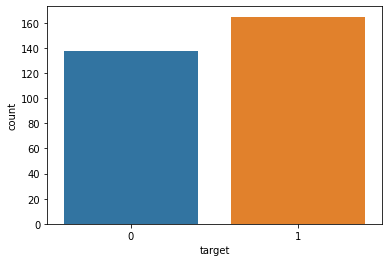

In [29]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

In [30]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

Analysing the 'Sex' feature

In [31]:
data["sex"].unique()

array([1, 0], dtype=int64)

We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

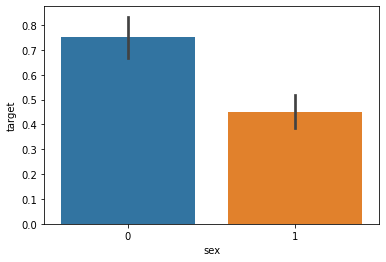

In [32]:
sns.barplot(data["sex"],y)

We have notice, that females are more likely to have heart problems than males

Analysing the 'Chest Pain Type' feature

In [33]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

As we expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

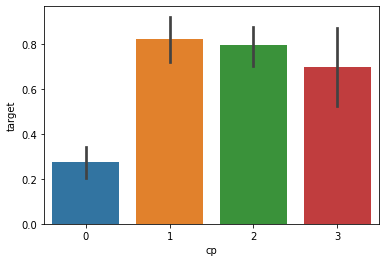

In [34]:
sns.barplot(data["cp"],y)

We have notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

Analysing the FBS feature

In [35]:
data["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [36]:
data["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

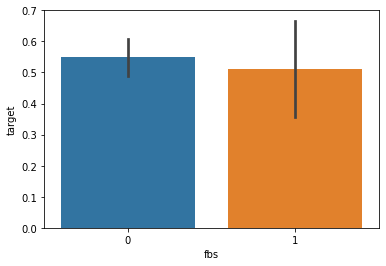

In [37]:
sns.barplot(data["fbs"],y)

Nothing that much extraordinary here

Analysing the restecg feature

In [38]:
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

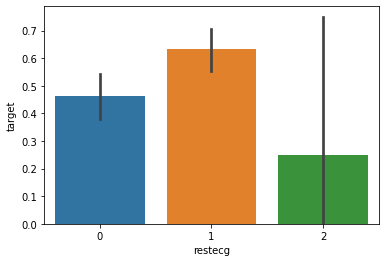

In [39]:
sns.barplot(data["restecg"],y)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

Analysing the 'exang' feature

In [40]:
data["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

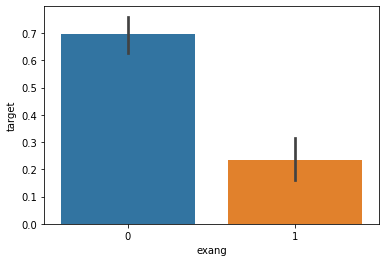

In [41]:
sns.barplot(data["exang"],y)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems.

Analysing the Slope feature

In [42]:
data["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

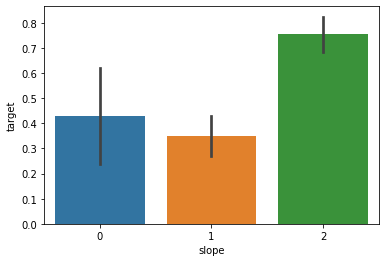

In [43]:
sns.barplot(data["slope"],y)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

From this we can say that number of major vessels (0-3) colored by flourosopy

In [44]:
data["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

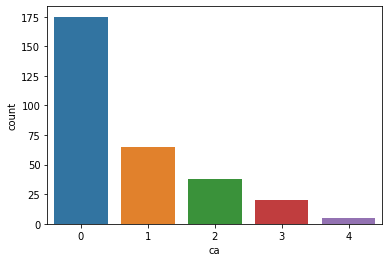

In [45]:
sns.countplot(data["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

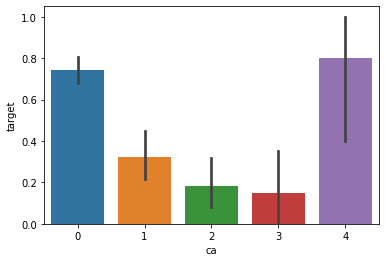

In [46]:
sns.barplot(data["ca"],y)

<h1 style="color:black">Get an overview distribution of each column </h1>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

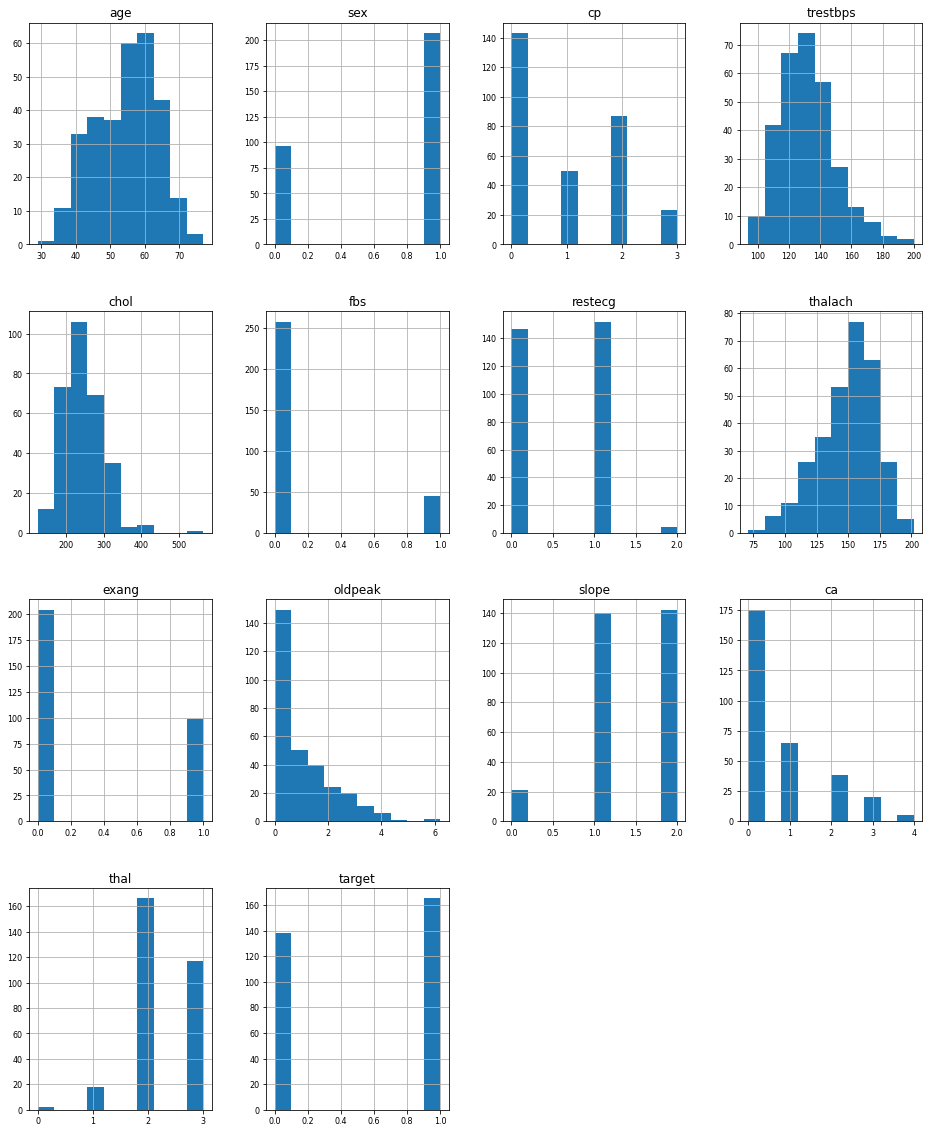

In [47]:
#heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# add bins ^^^

data.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

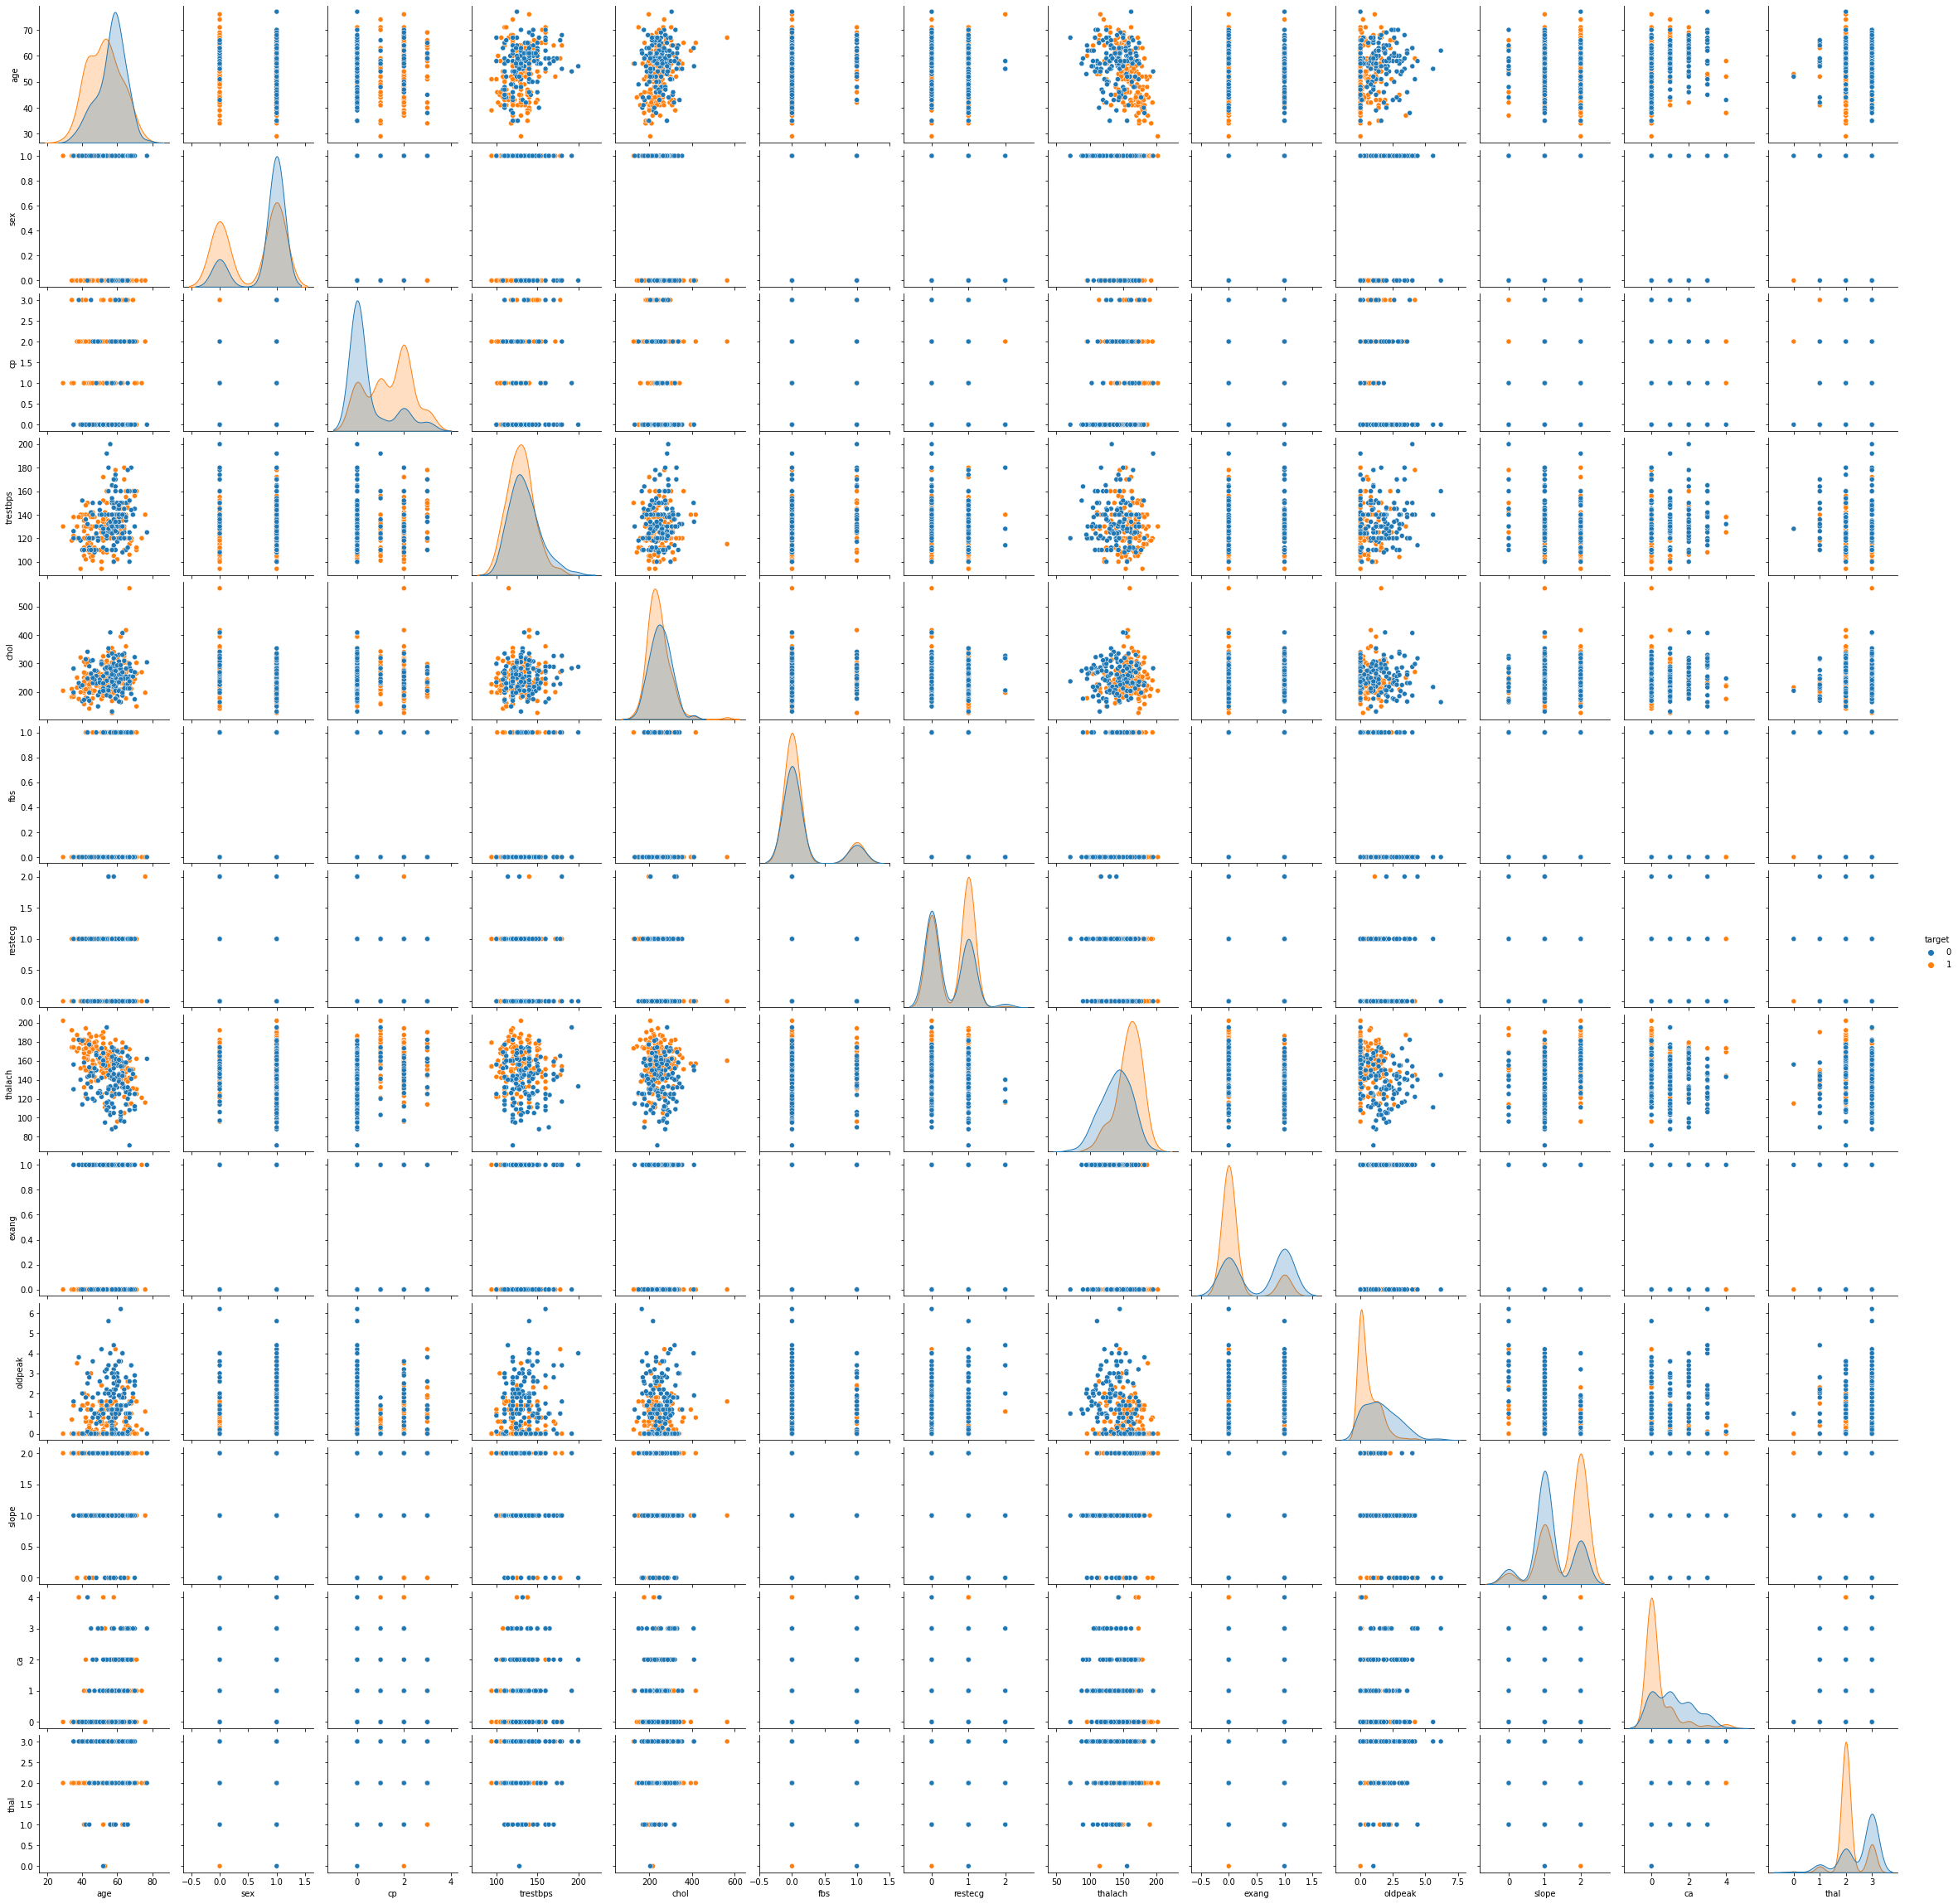

In [48]:
sns.pairplot(data, hue='target')

Zoom in on individual variables and correlations with target

From the above graph we can say that ca=4 has astonishingly large number of heart patients

<h1 style="color:black">Percentage of patient with or without heart problems in the given dataset </h1>

In [49]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [50]:
data["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

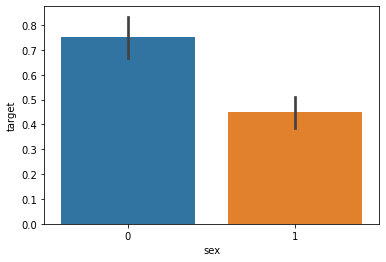

In [51]:
sns.barplot(data["sex"],data["target"])

Here 0 is female and 1 is male patients

In [52]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [53]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [54]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [55]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

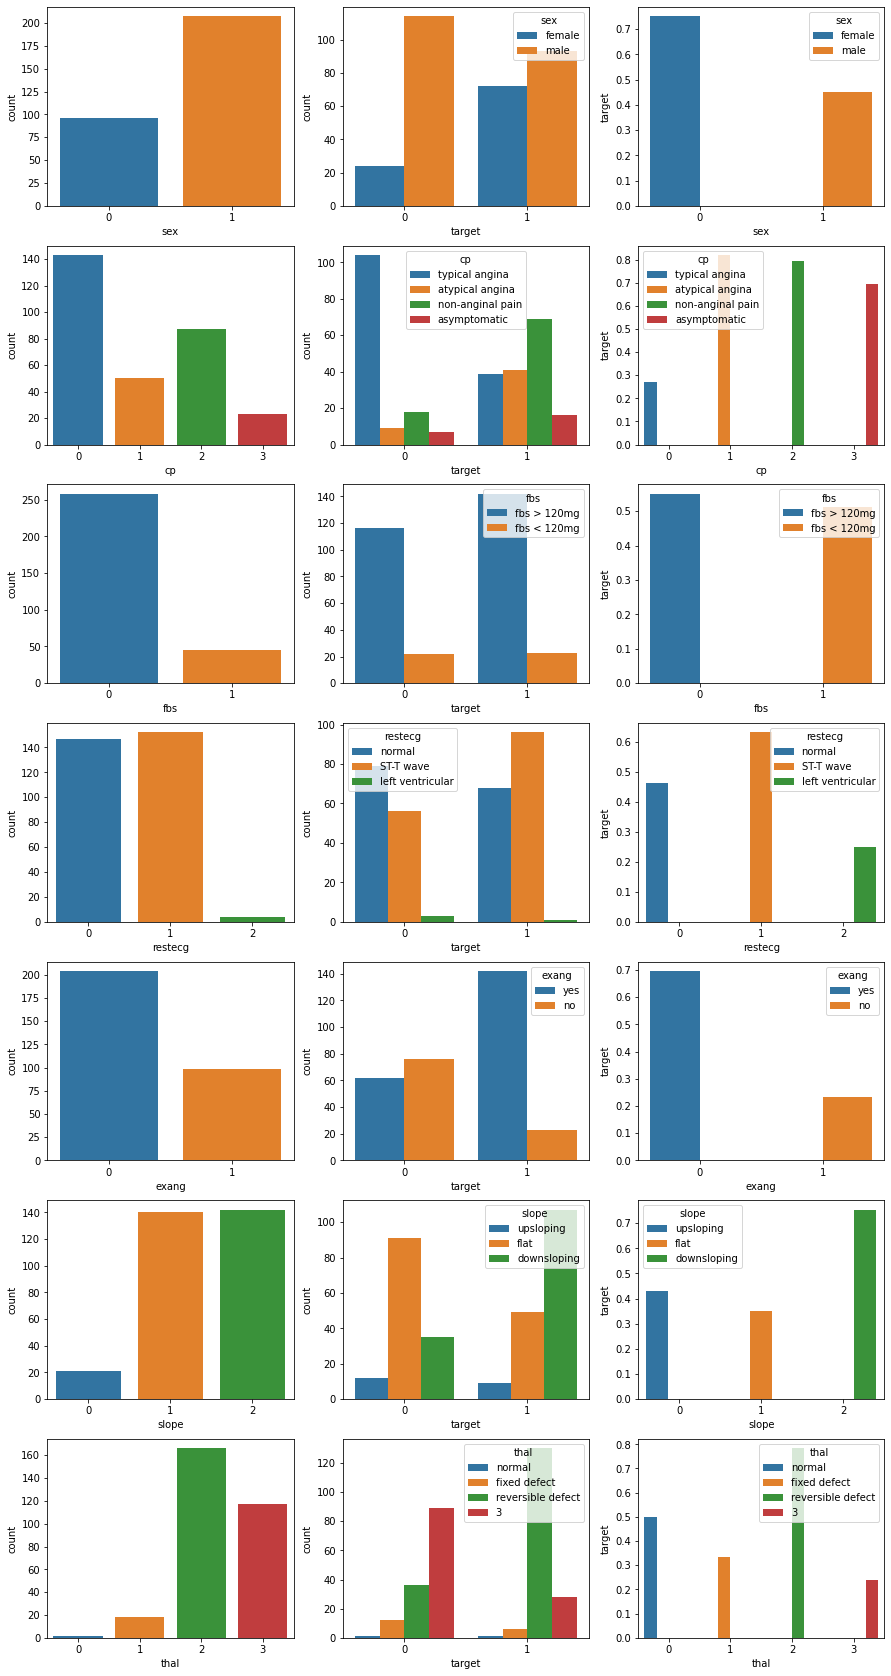

In [56]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [57]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [58]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

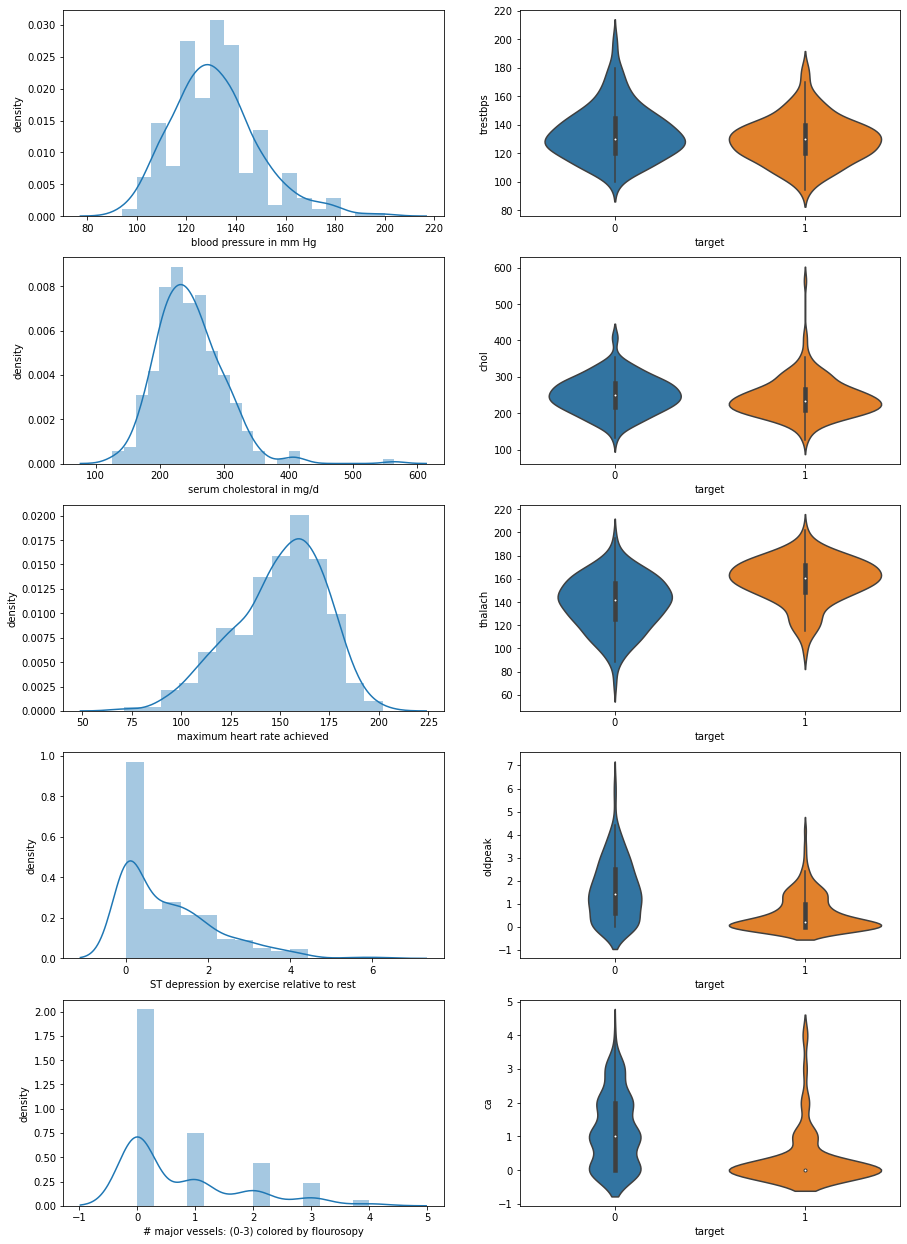

In [59]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

Heart Disease Frequency for ages

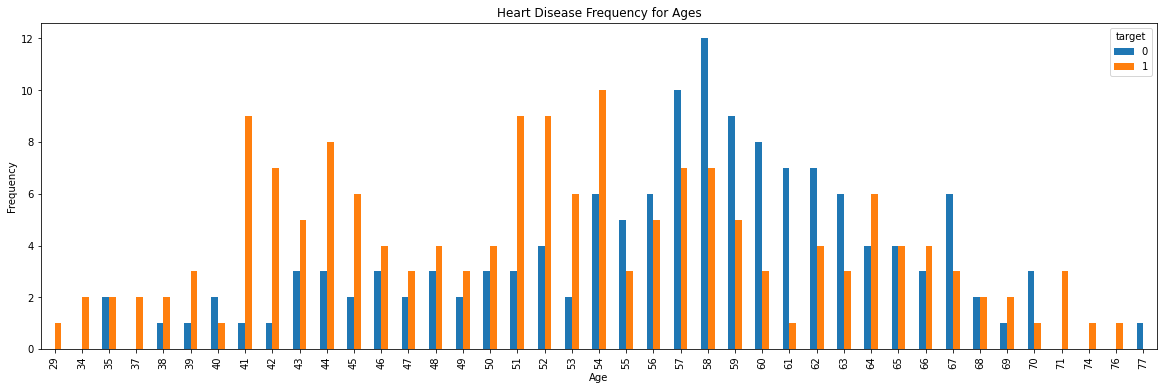

In [60]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

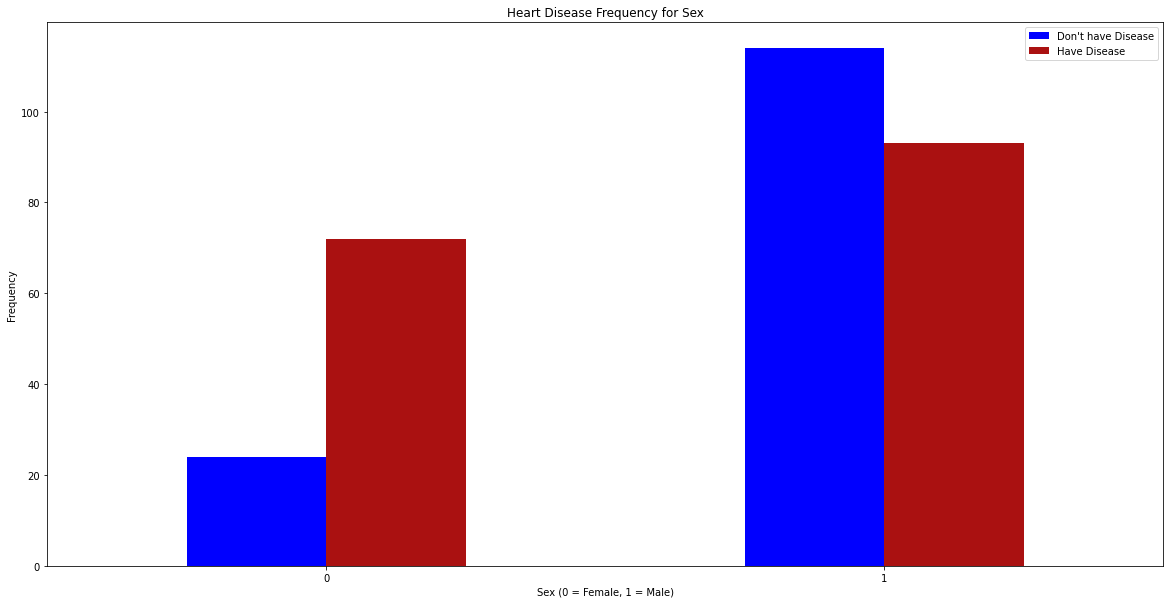

In [61]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

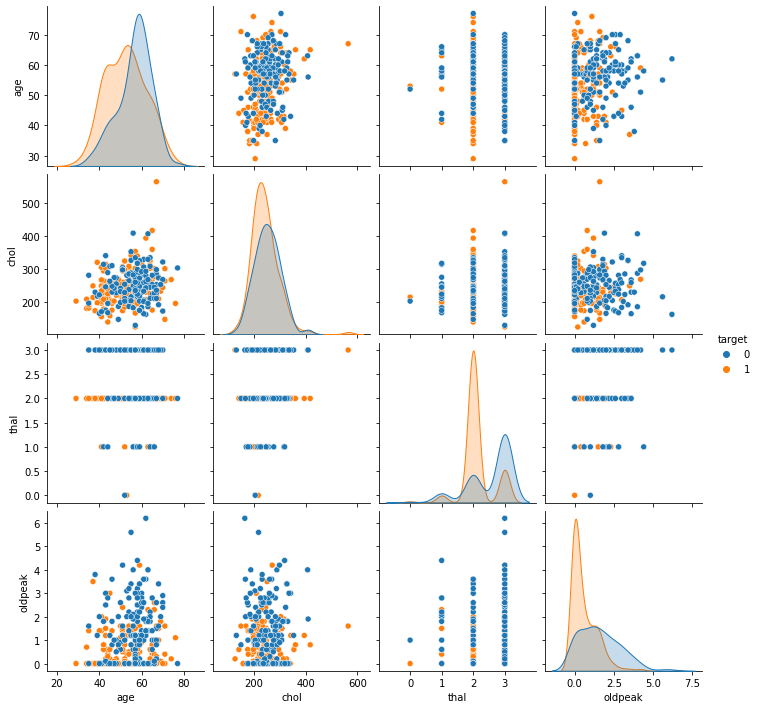

In [62]:
sns.pairplot(data , vars = ['age', 'chol', 'thal', 'oldpeak'], hue='target')

<h1 style="color:black">Splitting the dataset to Train and Test </h1>

In [63]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [64]:
X_train.shape

(242, 13)

In [65]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [66]:
X_test.shape

(61, 13)

In [67]:
Y_train.shape

(242,)

In [68]:
Y_test.shape

(61,)

<h1 style="color:black">Importing Accuracy score</h1>

In [69]:
from sklearn.metrics import accuracy_score

<h1 style="color:black">Modelling and predicting with Machine Learning</h1>

In [70]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

<h1 style="color:black">Logistic regression </h1>

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [72]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [73]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg',
                          multi_class='multinomial').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.9344262295081968

<h1 style="color:black">Confusion Matrix </h1>

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<AxesSubplot:>

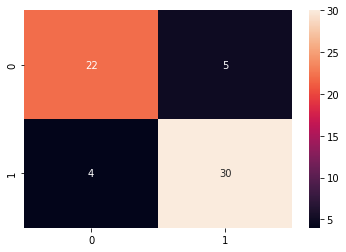

In [76]:
sns.heatmap(matrix,annot = True, fmt = "d")

<h1 style="color:black">precision Score </h1>

In [77]:
from sklearn.metrics import precision_score

In [78]:
precision = precision_score(Y_test, y_pred_lr)

In [79]:
print("Precision: ",precision)

Precision:  0.8571428571428571


<h1 style="color:black">Recall </h1>

In [80]:
from sklearn.metrics import recall_score

In [81]:
recall = recall_score(Y_test, y_pred_lr)

In [82]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


<h1 style="color:back">F-Score</h1>

balance of precision and recall score

In [83]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


cm using bad style

In [84]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,22,5
1,4,30


In [85]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative

In [86]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

<h1 style="color:black">Random Forest</h1>

In [87]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [88]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [89]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [90]:
Y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [91]:
#Random forest with 200 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


<h1 style="color:black">confusion matrix  </h1>

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<AxesSubplot:>

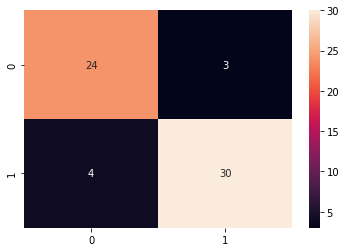

In [94]:
sns.heatmap(matrix,annot = True, fmt = "d")

<h1 style="color:black">precision score </h1>

In [95]:
from sklearn.metrics import precision_score

In [96]:
precision = precision_score(Y_test, y_pred_rf)

In [97]:
print("Precision: ",precision)

Precision:  0.9090909090909091


<h1 style="color:black">recall </h1>

In [98]:
from sklearn.metrics import recall_score

In [99]:
recall = recall_score(Y_test, y_pred_rf)

In [100]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


<h1 style="color:black">F score</h1>

In [101]:
print((2*precision*recall)/(precision+recall))

0.8955223880597014


cm using bad style

In [102]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,24,3
1,4,30


In [103]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

<h1 style="color:black">False negative rate of the model </h1>

In [104]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

<h1 style="color:black">Naive Bayes </h1>

In [105]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [106]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [107]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


<h1 style="color:black">confusion matrix</h1>

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<AxesSubplot:>

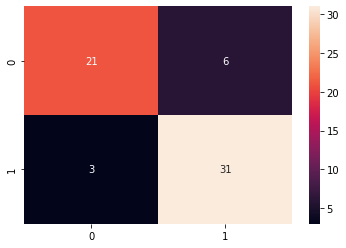

In [110]:
sns.heatmap(matrix,annot = True, fmt = "d")

<h1 style="color:black">precision score</h1>

In [111]:
from sklearn.metrics import precision_score

In [112]:
precision = precision_score(Y_test, y_pred_nb)

In [113]:
print("Precision: ",precision)

Precision:  0.8378378378378378


<h1 style="color:black">recall </h1>

In [114]:
from sklearn.metrics import recall_score

In [115]:
recall = recall_score(Y_test, y_pred_nb)

In [116]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


<h1 style="color:black">f score</h1>

In [117]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


bad cm style

In [118]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [119]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False negative rate of the model

In [120]:
fnr = FN*100/(FN+TP)
fnr

8.823529411764707

<h1 style="color:black">KNN(K Nearest Neighbors) </h1>

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [122]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [123]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


In [124]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,5):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 60.66%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%


<h1 style="color:black">Confusion matrix </h1>

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<AxesSubplot:>

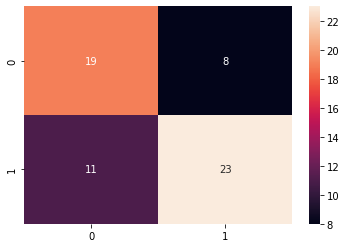

In [127]:
sns.heatmap(matrix,annot = True, fmt = "d")

<h1 style="color:black">precision score </h1>

In [128]:
from sklearn.metrics import precision_score

In [129]:
precision = precision_score(Y_test, y_pred_knn)

In [130]:
print("Precision: ",precision)

Precision:  0.7419354838709677


<h1 style="color:black">recall </h1>

In [131]:
from sklearn.metrics import recall_score

In [132]:
recall = recall_score(Y_test, y_pred_knn)

In [133]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


<h1 style="color:black">f score </h1>

In [134]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


bad cm

In [135]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,19,8
1,11,23


In [136]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative rate of the model

In [137]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

<h1 style="color:black">Decision Tree</h1>

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [168]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [139]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [140]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [141]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.820


<h1 style="color:black">Confusion Matrix </h1>

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<AxesSubplot:>

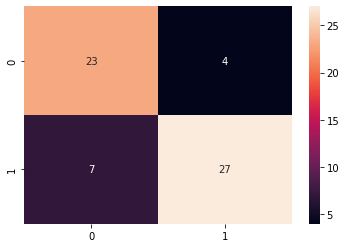

In [144]:
sns.heatmap(matrix,annot = True, fmt = "d")

<h1 style="color:black">precision score </h1>

In [145]:
from sklearn.metrics import precision_score

In [146]:
precision = precision_score(Y_test, y_pred_dt)

In [147]:
print("Precision: ",precision)

Precision:  0.8709677419354839


<h1 style="color:black">recall </h1>

In [148]:
from sklearn.metrics import recall_score

In [149]:
recall = recall_score(Y_test, y_pred_dt)

In [150]:
print("Recall is: ",recall)

Recall is:  0.7941176470588235


<h1 style="color:black">f score</h1>

In [151]:
print((2*precision*recall)/(precision+recall))

0.8307692307692308


bad cm style

In [152]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0,0,1
target,,
0,23,4
1,7,27


<h1 style="color:black">false negative rate </h1>

In [153]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

20.58823529411765

<h1 style="color:black">SVM </h1>

In [154]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [155]:
Y_pred_svm.shape

(61,)

In [156]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


<h1 style="color:black">XGBoost </h1>

In [157]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [158]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[13:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [159]:
Y_pred_xgb.shape

(61,)

In [160]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


<h1 style="color:black">FINAL SCORE</h1>

In [161]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf,score_xgb,score_svm]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest","Xgboost","Support Vector Machine"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 68.85 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using Xgboost is: 78.69 %
The accuracy score achieved using Support Vector Machine is: 81.97 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

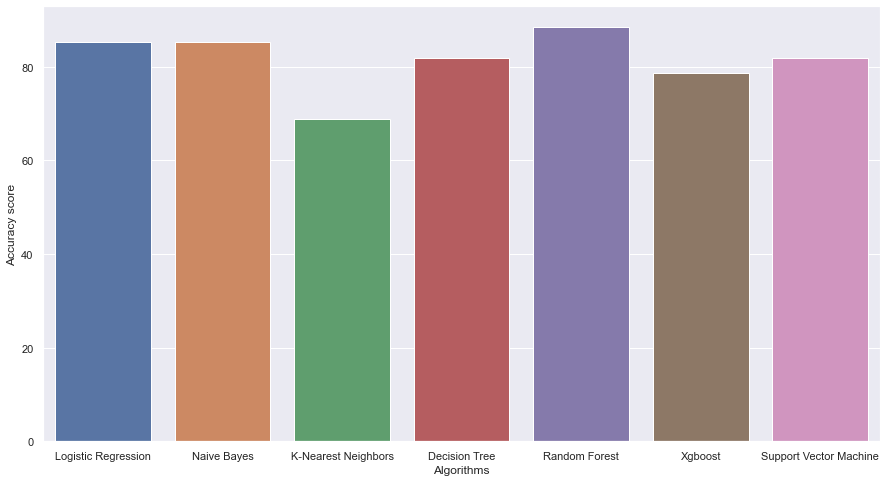

In [162]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf,score_xgb,score_svm]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest",'Xgboost','Support Vector Machine'] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [163]:
import pickle
pickle.dump(rf,open('heartdisease.pkl','wb'))